# Importing libraries

In [3]:
import warnings 
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Load the dataset

In [4]:
df = pd.read_csv('survey.csv', parse_dates=['Timestamp'])
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# get the columns of the dataframe

df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

<h3 style = "font-family: Comic Sans MS	"> Understanding the Columns: </h3>

* **Timestamp** the time of recording
* **Age**   the age of the respondant
* **Gender**    the Gender of the respondant
* **Country**   Location
* **state:** If you live in the United States, which state or territory do you live in?
* **self_employed:** Are you self-employed?
* **family_history:** Do you have a family history of mental illness?
* **treatment:** Have you sought treatment for a mental health condition?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* **comments:** Any additional notes or comments

In [6]:
# get the shape of the dataframe
df.shape

(1259, 27)

In [7]:
# get the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      744 non-null    object        
 5   self_employed              1241 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             995 non-null    object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [8]:
# check for the null values

df.isnull().sum()   

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Important Inferences:

* The dataset contains a total of **26** columns.
* Except for the age column, all other columns are of object datatype.
* The comment column has the highest number of null values, accounting for **70%**. This is understandable as it was an optional text box, and many respondents likely left it blank.
* We will drop the timestamp column since it contains the date, month, year, and time when the respondent completed the questionnaire, which is not relevant to our analysis.
* The state column also has a significant number of null values, which requires further investigation.

In [9]:
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


- there are many genders that are same but differently categorized.
* Male, or cis Male, means born as male and decide to be male.
* Female, or cis Female, means born as female and decide to be female.
* Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.

In [10]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Gender
Male      991
Female    247
Other      21
Name: count, dtype: int64

In [14]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

In [29]:
df.isnull().sum()   

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                263
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1091
dtype: int64

In [30]:
df.treatment.value_counts()

treatment
Yes    633
No     621
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

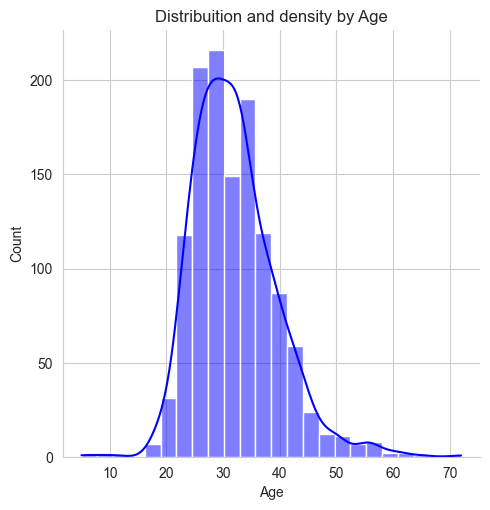

In [23]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
# add curve into the distribution
sns.displot(df["Age"], bins=24, color='b', kde=True)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

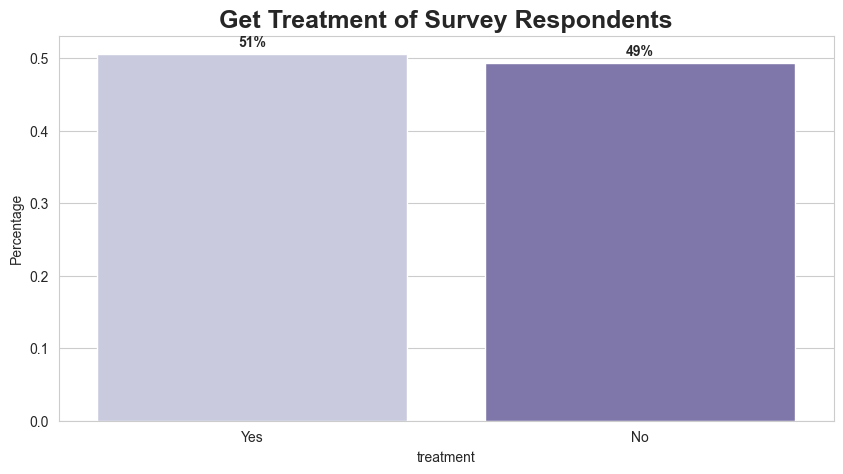

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


This is our target variable.
Looking at the first graph, we see that the percentage of respondents who want to get treatment is exactly 51%. Workplaces that promote mental health and support people with mental disorders are more likely to  have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:

<Axes: xlabel='treatment', ylabel='count'>

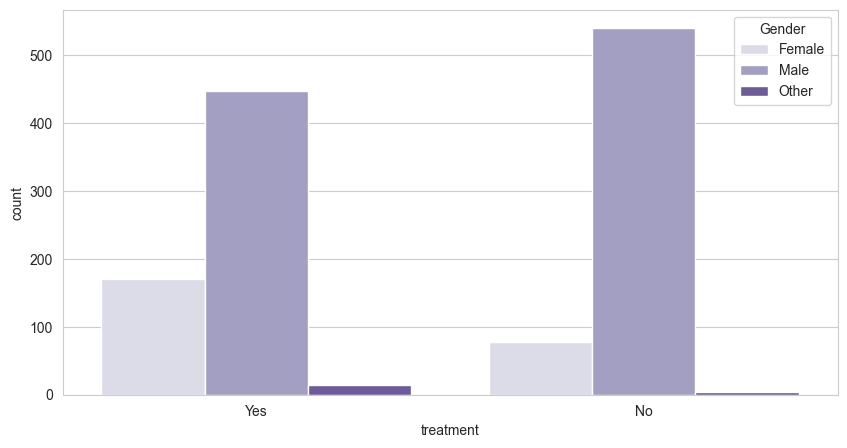

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize = (10,5))

sns.countplot(x = 'treatment', data = df, palette='Purples', hue= 'Gender')



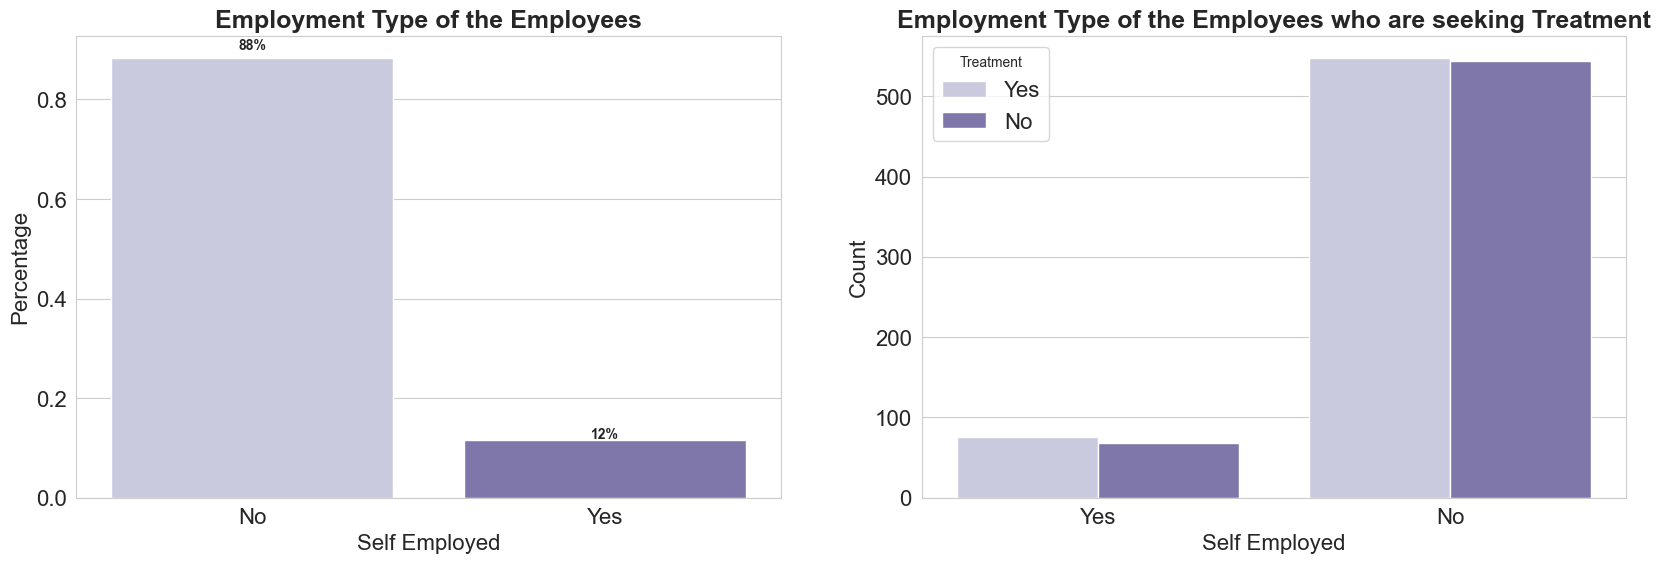

In [31]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax = sns.barplot(x='self_employed', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Employment Type of the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Purples')
plt.title('Employment Type of the Employees who are seeking Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.show()

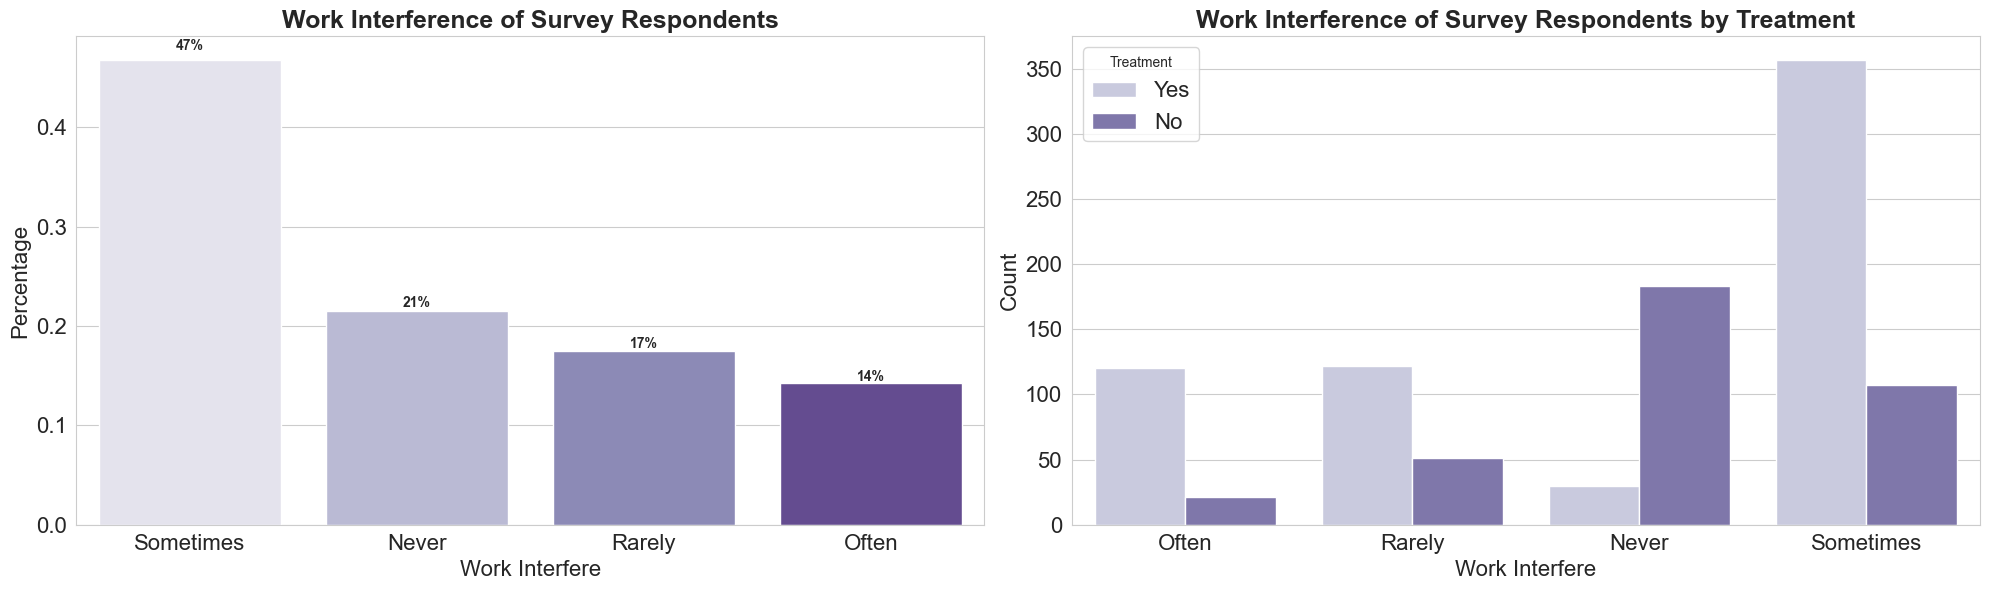

In [33]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Work Interfere', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=df, palette='Purples')
plt.title('Work Interference of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Work Interfere', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>


This was the respondent's answer to the question, **'If you have a mental health condition, do you feel that it interferes with your work?'.**

* On seeing the first graph we conclude that around 48% of people say that sometimes work interefers with their mental health. Now **'Sometimes'** is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
* Coming to our second graph, we see that the people who chose **'Sometimes'** had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the **'Often category'*.
* But what is more surprising to know is that even for people whose mental health **'Never'** has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker.



> We will be leaving the 'number_of_employees' category and move forward with the next column which is 'remote_work'.

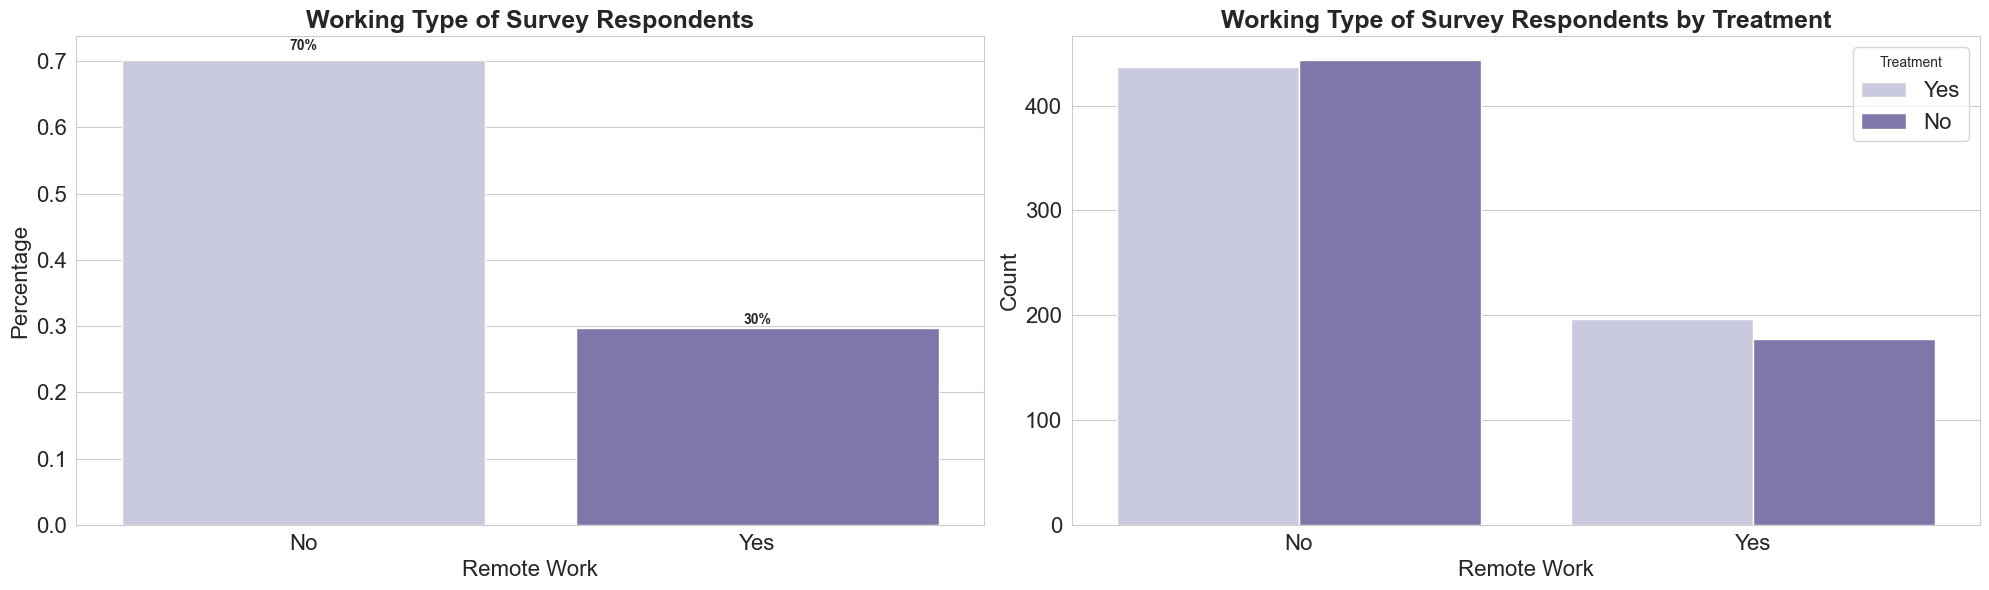

In [35]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
ax = sns.barplot(x='remote_work', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=df, palette='Purples')
plt.title('Working Type of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

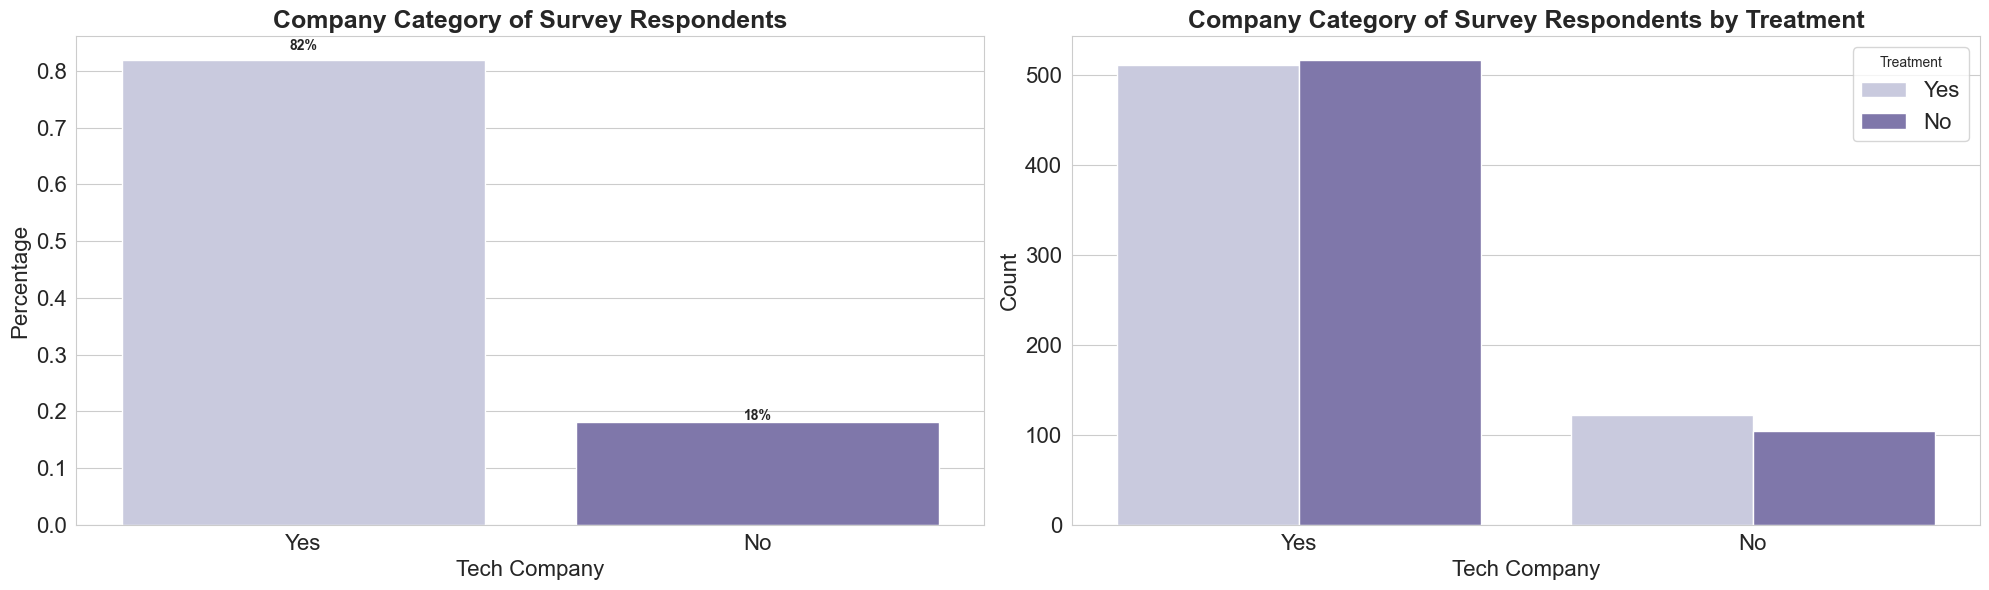

In [36]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax = sns.barplot(x='tech_company', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Company Category of Survey Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=df, palette='Purples')
plt.title('Company Category of Survey Respondents by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()

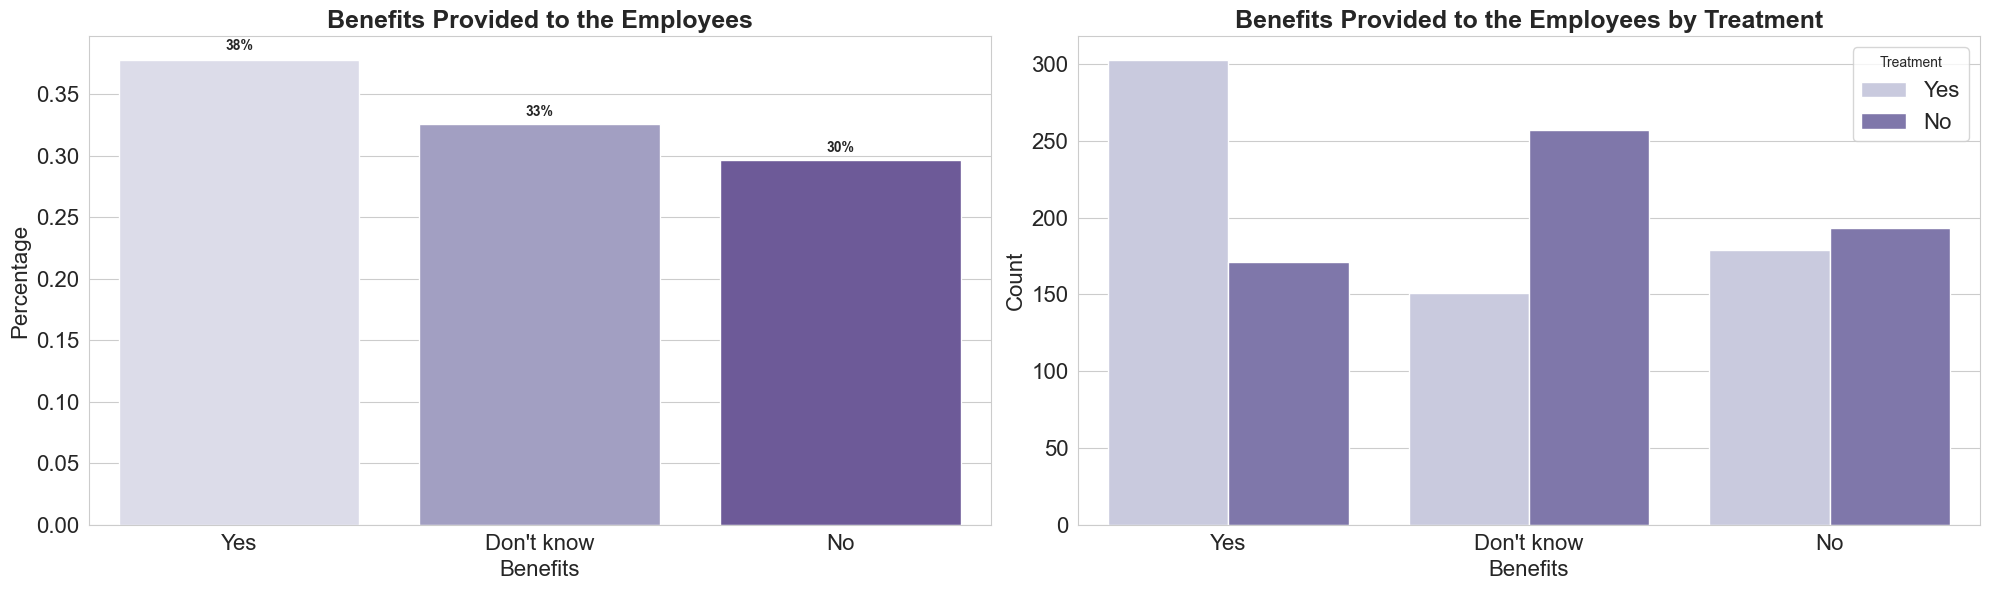

In [37]:
plt.figure(figsize=(20, 6))

# First subplot
plt.subplot(1, 2, 1)
eda_percentage = df['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
ax = sns.barplot(x='benefits', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Benefits Provided to the Employees', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='benefits', hue='treatment', data=df, palette='Purples')
plt.title('Benefits Provided to the Employees by Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Treatment', fontsize=16)

plt.tight_layout()
plt.show()